In [0]:
import pandas as pd
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [4]:
df = pd.read_csv("train.csv")
df.isnull().any().any()
#df.describe()

False

In [0]:
y = df['Label']
X = df.drop(columns=['Id', 'Label'])
X.shape
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))
print(x_train.shape, x_test.shape)

(54000, 28, 28, 1) (6000, 28, 28, 1)


In [0]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [6]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [8]:
import itertools

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder



#evaluation metrics :

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, cohen_kappa_score, roc_auc_score  


# Deep Learning Libraries
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten, Lambda, Input, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Add
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from keras.layers import LeakyReLU
from keras.applications import VGG19
from tensorflow import keras



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno



Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [0]:
keras.backend.clear_session()
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1), padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))


model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd',
              metrics=['accuracy'])




In [11]:
history = model.fit(x_train, y_train,
          batch_size=250,
          epochs=500,
          shuffle = True,
          validation_data=(x_test, y_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/500
54000/54000 [==============================] - 10s 185us/step - loss: 1.5514 - accuracy: 0.2521 - val_loss: 1.4375 - val_accuracy: 0.3733
Epoch 2/500
54000/54000 [==============================] - 3s 55us/step - loss: 1.3349 - accuracy: 0.4075 - val_loss: 1.1264 - val_accuracy: 0.5112
Epoch 3/500
54000/54000 [==============================] - 3s 54us/step - loss: 1.1022 - accuracy: 0.5088 - val_loss: 0.9394 - val_accuracy: 0.6057
Epoch 4/500
54000/54000 [==============================] - 3s 54us/step - loss: 0.9781 - accuracy: 0.5651 - val_loss: 0.8451 - val_accuracy: 0.6530
Epoch 5/500
54000/54000 [==============================] - 3s 54us/step - loss: 0.9142 - accuracy: 0.5984 - val_loss: 0.8002 - val_accuracy: 0.6723
Epoch 6/500
54000/54000 [==============================] - 3s 54us/step - loss: 0.8685 - accuracy: 0.6196 - val_loss: 0.7597 - val_accuracy: 0.6845
Epoch 7/500
54000/54000 [==============================] - 3s

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

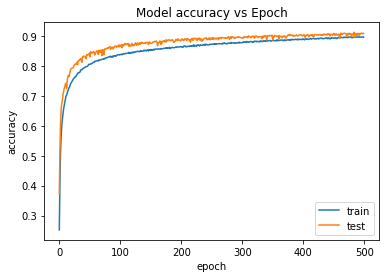

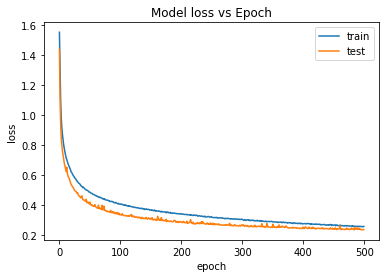

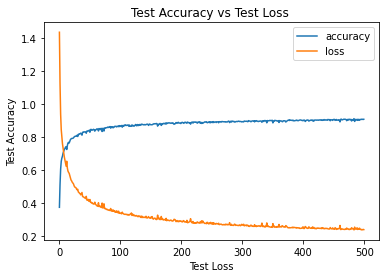

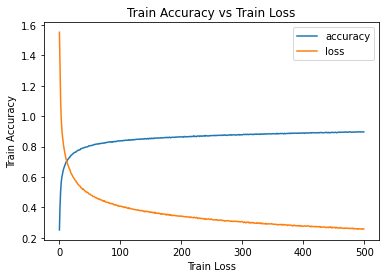

In [13]:
#score = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Test Accuracy vs Test Loss based on Epochs')
plt.ylabel('Test Accuracy, Test Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Training Accuracy vs Training Loss based on Epochs')
plt.ylabel('Train Accuracy, Train Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [14]:
#Metrics

#model = get_model(trainX, trainy)


# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]
rounded_labels=np.argmax(y_test, axis=1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(rounded_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(rounded_labels, yhat_classes, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(rounded_labels, yhat_classes, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(rounded_labels, yhat_classes, average='micro')
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(rounded_labels, yhat_classes)
print('Cohens kappa: %f' % kappa)

Accuracy: 0.908667
Precision: 0.908667
Recall: 0.908667
F1 score: 0.908667
Cohens kappa: 0.885818


In [0]:
from pathlib import Path

# Save neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("model_weights.h5")

In [0]:
pred = pd.read_csv("testX.csv")
pred = pred.drop(columns=['Id'])

In [17]:
x_pred = pred.values.reshape((-1, 28, 28, 1))
x_pred.shape

(10000, 28, 28, 1)

In [0]:
x_pred = x_pred.astype("float32")/255

In [19]:
start_time = time.time()
y_pred = model.predict(x_pred)
end_time = time.time()
time_taken = end_time - start_time
print(time_taken)

0.5104687213897705


In [20]:
y_ans = list()

for i in range(0, 10000):
  k = 0
  for j in range(1, 5):
    if(y_pred[i][j] > y_pred[i][k]):
      k = j

  y_ans.append(k)

len(y_ans)


10000

In [21]:
pppp = pd.read_csv("testX.csv")
id = pppp['Id']
len(id)
ans = np.column_stack((id, y_ans))
print(ans.shape)
df_ans = pd.DataFrame(data=ans, columns=['Id', 'Label'])
df_ans.describe()
df_ans.to_csv("samplesubmission.csv")

(10000, 2)
